Softmax Regression

Dataset shape: (708, 10)
Columns: ['Student_ID', 'Gender', 'Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities', 'Final_Exam_Score', 'Pass_Fail']
Dataset shape: (708, 10)
Columns: ['Student_ID', 'Gender', 'Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities', 'Final_Exam_Score', 'Pass_Fail']

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Student_ID                  708 non-null    object
 1   Gender                      708 non-null    object
 2   Study_Hours_per_Week        708 non-null    int64 
 3   Attendance_Rate             708 non-null    object
 4   Past_Exam_Scores            708 non-null    int64 
 

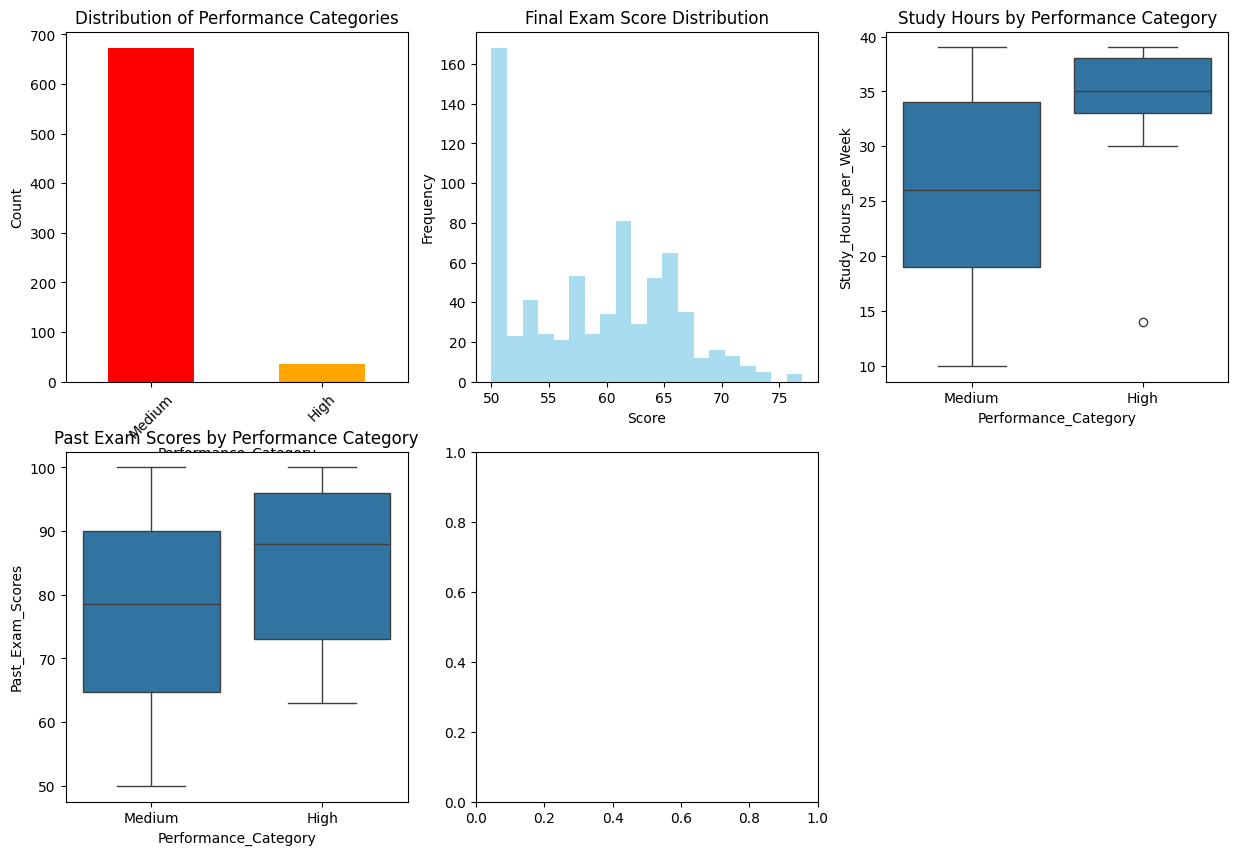

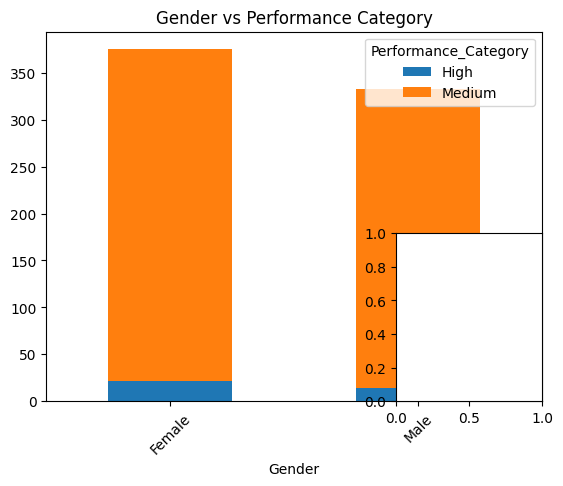

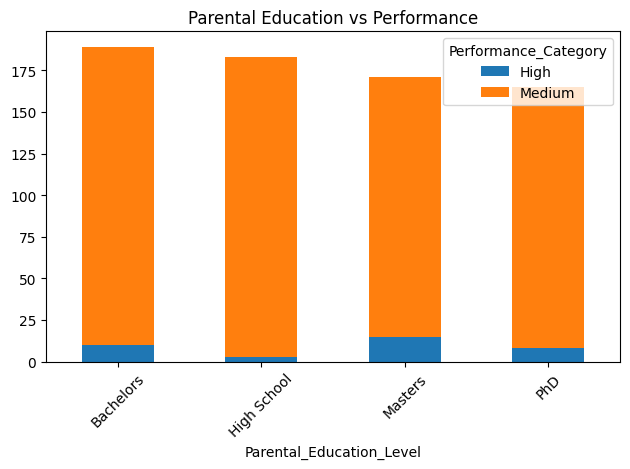


=== DATA PREPROCESSING ===
Gender encoding: {'Female': np.int64(0), 'Male': np.int64(1)}
Parental_Education_Level encoding: {'Bachelors': np.int64(0), 'High School': np.int64(1), 'Masters': np.int64(2), 'PhD': np.int64(3)}
Internet_Access_at_Home encoding: {'No': np.int64(0), 'Yes': np.int64(1)}
Extracurricular_Activities encoding: {'No': np.int64(0), 'Yes': np.int64(1)}

Feature matrix shape: (708, 6)
Target vector shape: (708,)
Feature columns: ['Study_Hours_per_Week', 'Past_Exam_Scores', 'Gender_encoded', 'Parental_Education_Level_encoded', 'Internet_Access_at_Home_encoded', 'Extracurricular_Activities_encoded']

Training set: (566, 6), (566,)
Testing set: (142, 6), (142,)

=== FEATURE SCALING COMPLETED ===
Training set scaled shape: (566, 6)
Testing set scaled shape: (142, 6)

=== TRAINING SOFTMAX REGRESSION MODEL ===
Model training completed!

=== MODEL EVALUATION ===
Accuracy: 0.9507

Classification Report:
              precision    recall  f1-score   support

        High     

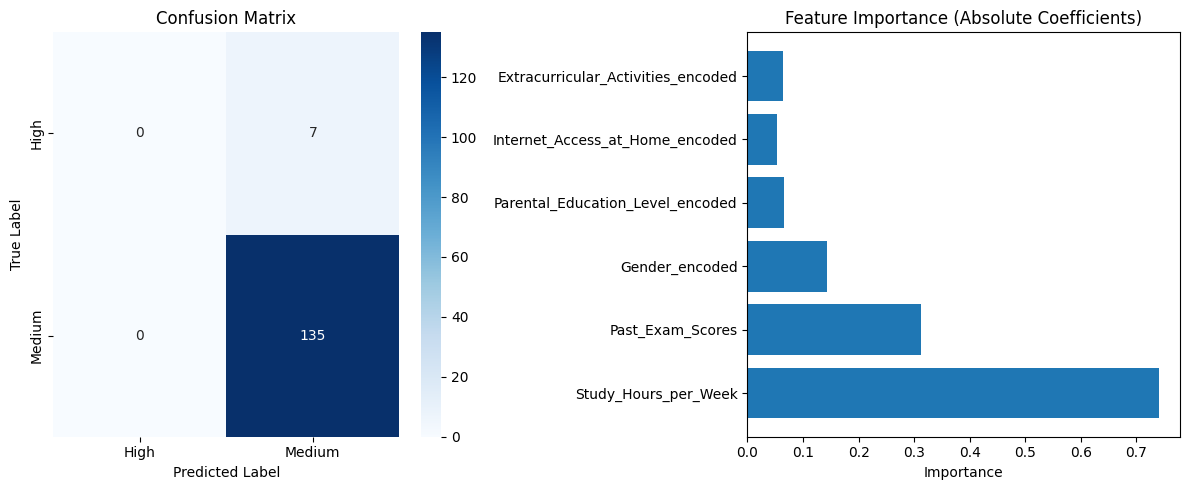


=== PREDICTION PROBABILITY ANALYSIS ===
Sample Predictions with Probabilities:
Classes: ['High' 'Medium']
Sample 1: True=Medium, Pred=Medium
  P(High) = 0.1239
  P(Medium) = 0.8761

Sample 2: True=Medium, Pred=Medium
  P(High) = 0.0484
  P(Medium) = 0.9516

Sample 3: True=Medium, Pred=Medium
  P(High) = 0.0210
  P(Medium) = 0.9790

Sample 4: True=Medium, Pred=Medium
  P(High) = 0.0011
  P(Medium) = 0.9989

Sample 5: True=Medium, Pred=Medium
  P(High) = 0.0013
  P(Medium) = 0.9987

Sample 6: True=Medium, Pred=Medium
  P(High) = 0.0073
  P(Medium) = 0.9927

Sample 7: True=Medium, Pred=Medium
  P(High) = 0.1828
  P(Medium) = 0.8172

Sample 8: True=Medium, Pred=Medium
  P(High) = 0.0109
  P(Medium) = 0.9891

Sample 9: True=Medium, Pred=Medium
  P(High) = 0.1396
  P(Medium) = 0.8604

Sample 10: True=Medium, Pred=Medium
  P(High) = 0.0572
  P(Medium) = 0.9428


=== EXAMPLE PREDICTIONS ===
Example 1: Good Student Profile
Predicted Performance Category: Medium
Probabilities:
  P(High) = 0.069

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

# ====== 1. LOAD DAN PREPROCESSING DATA ======
# Load dataset
df = pd.read_csv('student_performance_dataset.csv', delimiter=';')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Baca dataset
df = pd.read_csv('student_performance_dataset.csv', delimiter=';')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Tampilkan info dataset
print("\n=== DATASET INFO ===")
print(df.info())
print("\n=== FIRST 5 ROWS ===")
print(df.head())

# ====== 2. EKSPLORASI DATA ======
print("\n=== DATA EXPLORATION ===")

# Statistik deskriptif untuk variabel numerik
print("Statistik Final_Exam_Score:")
print(df['Final_Exam_Score'].describe())

# Membuat target multiclass berdasarkan Final_Exam_Score
def create_performance_category(score):
    if score < 50:
        return 'Low'
    elif score < 70:
        return 'Medium'
    else:
        return 'High'

df['Performance_Category'] = df['Final_Exam_Score'].apply(create_performance_category)

# Distribusi target class
print("\n=== TARGET CLASS DISTRIBUTION ===")
print(df['Performance_Category'].value_counts())

# Visualisasi distribusi
plt.figure(figsize=(15, 10))

# Plot 1: Distribusi Performance Category
plt.subplot(2, 3, 1)
df['Performance_Category'].value_counts().plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Distribution of Performance Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot 2: Final Exam Score Distribution
plt.subplot(2, 3, 2)
plt.hist(df['Final_Exam_Score'], bins=20, alpha=0.7, color='skyblue')
plt.title('Final Exam Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Plot 3: Study Hours vs Performance
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Performance_Category', y='Study_Hours_per_Week')
plt.title('Study Hours by Performance Category')

# Plot 4: Past Exam Scores vs Performance
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Performance_Category', y='Past_Exam_Scores')
plt.title('Past Exam Scores by Performance Category')

# Plot 5: Gender Distribution
plt.subplot(2, 3, 5)
pd.crosstab(df['Gender'], df['Performance_Category']).plot(kind='bar', stacked=True)
plt.title('Gender vs Performance Category')
plt.xticks(rotation=45)

# Plot 6: Parental Education vs Performance
plt.subplot(2, 3, 6)
pd.crosstab(df['Parental_Education_Level'], df['Performance_Category']).plot(kind='bar', stacked=True)
plt.title('Parental Education vs Performance')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# ====== 3. PREPROCESSING UNTUK MODEL ======
print("\n=== DATA PREPROCESSING ===")

# Pilih fitur untuk model
feature_columns = [
    'Study_Hours_per_Week', 'Past_Exam_Scores', 'Gender',
    'Parental_Education_Level', 'Internet_Access_at_Home',
    'Extracurricular_Activities'
]

# Buat copy dataset untuk preprocessing
df_model = df.copy()

# Encode variabel kategorikal
label_encoders = {}
categorical_columns = ['Gender', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities']

for col in categorical_columns:
    le = LabelEncoder()
    df_model[col + '_encoded'] = le.fit_transform(df_model[col])
    label_encoders[col] = le
    print(f"{col} encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Siapkan features dan target
X_features = [
    'Study_Hours_per_Week', 'Past_Exam_Scores', 'Gender_encoded',
    'Parental_Education_Level_encoded', 'Internet_Access_at_Home_encoded',
    'Extracurricular_Activities_encoded'
]

X = df_model[X_features]
y = df_model['Performance_Category']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Feature columns: {X_features}")

# ====== 4. SPLIT DATA ======
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

# ====== 5. FEATURE SCALING ======
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n=== FEATURE SCALING COMPLETED ===")
print(f"Training set scaled shape: {X_train_scaled.shape}")
print(f"Testing set scaled shape: {X_test_scaled.shape}")

# ====== 6. SOFTMAX REGRESSION MODEL ======
print("\n=== TRAINING SOFTMAX REGRESSION MODEL ===")

# Logistic Regression dengan multinomial (softmax)
softmax_model = LogisticRegression(
    multi_class='multinomial',  # Menggunakan softmax untuk multiclass
    solver='lbfgs',            # Solver yang mendukung multinomial
    max_iter=1000,
    random_state=42
)

# Train model
softmax_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = softmax_model.predict(X_test_scaled)
y_pred_proba = softmax_model.predict_proba(X_test_scaled)

print("Model training completed!")

# ====== 7. EVALUASI MODEL ======
print("\n=== MODEL EVALUATION ===")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=softmax_model.classes_,
            yticklabels=softmax_model.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Feature Importance
plt.subplot(1, 2, 2)
feature_importance = abs(softmax_model.coef_[0])  # Ambil koefisien kelas pertama
feature_names = X_features
plt.barh(feature_names, feature_importance)
plt.title('Feature Importance (Absolute Coefficients)')
plt.xlabel('Importance')

plt.tight_layout()
plt.show()

# ====== 8. ANALISIS PROBABILITAS PREDIKSI ======
print("\n=== PREDICTION PROBABILITY ANALYSIS ===")

# Contoh prediksi dengan probabilitas
sample_predictions = y_pred_proba[:10]
print("Sample Predictions with Probabilities:")
print(f"Classes: {softmax_model.classes_}")

for i, (true_label, pred_label, proba) in enumerate(zip(y_test[:10], y_pred[:10], sample_predictions)):
    print(f"Sample {i+1}: True={true_label}, Pred={pred_label}")
    for j, class_name in enumerate(softmax_model.classes_):
        print(f"  P({class_name}) = {proba[j]:.4f}")
    print()

# ====== 9. FUNGSI PREDIKSI BARU ======
def predict_student_performance(study_hours, past_scores, gender, parental_edu, internet, extracurricular):
    """
    Fungsi untuk memprediksi performance category student baru

    Parameters:
    - study_hours: jam belajar per minggu
    - past_scores: nilai ujian sebelumnya
    - gender: 'Male' atau 'Female'
    - parental_edu: 'High School', 'Bachelors', 'Masters', 'PhD'
    - internet: 'Yes' atau 'No'
    - extracurricular: 'Yes' atau 'No'
    """

    # Encode categorical variables
    gender_encoded = label_encoders['Gender'].transform([gender])[0]
    parental_edu_encoded = label_encoders['Parental_Education_Level'].transform([parental_edu])[0]
    internet_encoded = label_encoders['Internet_Access_at_Home'].transform([internet])[0]
    extracurricular_encoded = label_encoders['Extracurricular_Activities'].transform([extracurricular])[0]

    # Buat array input
    input_data = np.array([[
        study_hours, past_scores, gender_encoded,
        parental_edu_encoded, internet_encoded, extracurricular_encoded
    ]])

    # Scale input
    input_scaled = scaler.transform(input_data)

    # Prediksi
    prediction = softmax_model.predict(input_scaled)[0]
    probabilities = softmax_model.predict_proba(input_scaled)[0]

    print(f"Predicted Performance Category: {prediction}")
    print("Probabilities:")
    for i, class_name in enumerate(softmax_model.classes_):
        print(f"  P({class_name}) = {probabilities[i]:.4f}")

    return prediction, probabilities

# ====== 10. CONTOH PENGGUNAAN ======
print("\n=== EXAMPLE PREDICTIONS ===")

# Contoh 1: Student dengan profil bagus
print("Example 1: Good Student Profile")
predict_student_performance(
    study_hours=30,
    past_scores=85,
    gender='Female',
    parental_edu='Masters',
    internet='Yes',
    extracurricular='Yes'
)

print("\n" + "="*50)

# Contoh 2: Student dengan profil kurang
print("Example 2: Poor Student Profile")
predict_student_performance(
    study_hours=10,
    past_scores=60,
    gender='Male',
    parental_edu='High School',
    internet='No',
    extracurricular='No'
)

print("\n=== MODEL SUMMARY ===")
print(f"Model Type: Multinomial Logistic Regression (Softmax)")
print(f"Number of Features: {len(X_features)}")
print(f"Number of Classes: {len(softmax_model.classes_)}")
print(f"Classes: {softmax_model.classes_}")
print(f"Training Accuracy: {softmax_model.score(X_train_scaled, y_train):.4f}")
print(f"Testing Accuracy: {accuracy:.4f}")

One-vs-All


Parental Education Level distribution:
Parental_Education_Level
Bachelors      189
High School    183
Masters        171
PhD            165
Name: count, dtype: int64

Grade Category distribution:
Grade_Category
C    318
D    232
B    154
A      4
Name: count, dtype: int64

Feature matrix shape: (708, 6)
Features used: ['Gender_encoded', 'Study_Hours_per_Week', 'Past_Exam_Scores', 'Internet_Access_at_Home_encoded', 'Extracurricular_Activities_encoded', 'Final_Exam_Score']

MULTICLASS CLASSIFICATION - ONE VS ALL

1. PARENTAL EDUCATION LEVEL CLASSIFICATION
----------------------------------------
Training set size: 566
Test set size: 142
Classes: ['Bachelors' 'High School' 'Masters' 'PhD']

--- Logistic Regression One-vs-All ---
Accuracy: 0.3028

Classification Report:
              precision    recall  f1-score   support

   Bachelors       0.29      0.34      0.31        38
 High School       0.38      0.35      0.37        37
     Masters       0.33      0.32      0.33        34
     

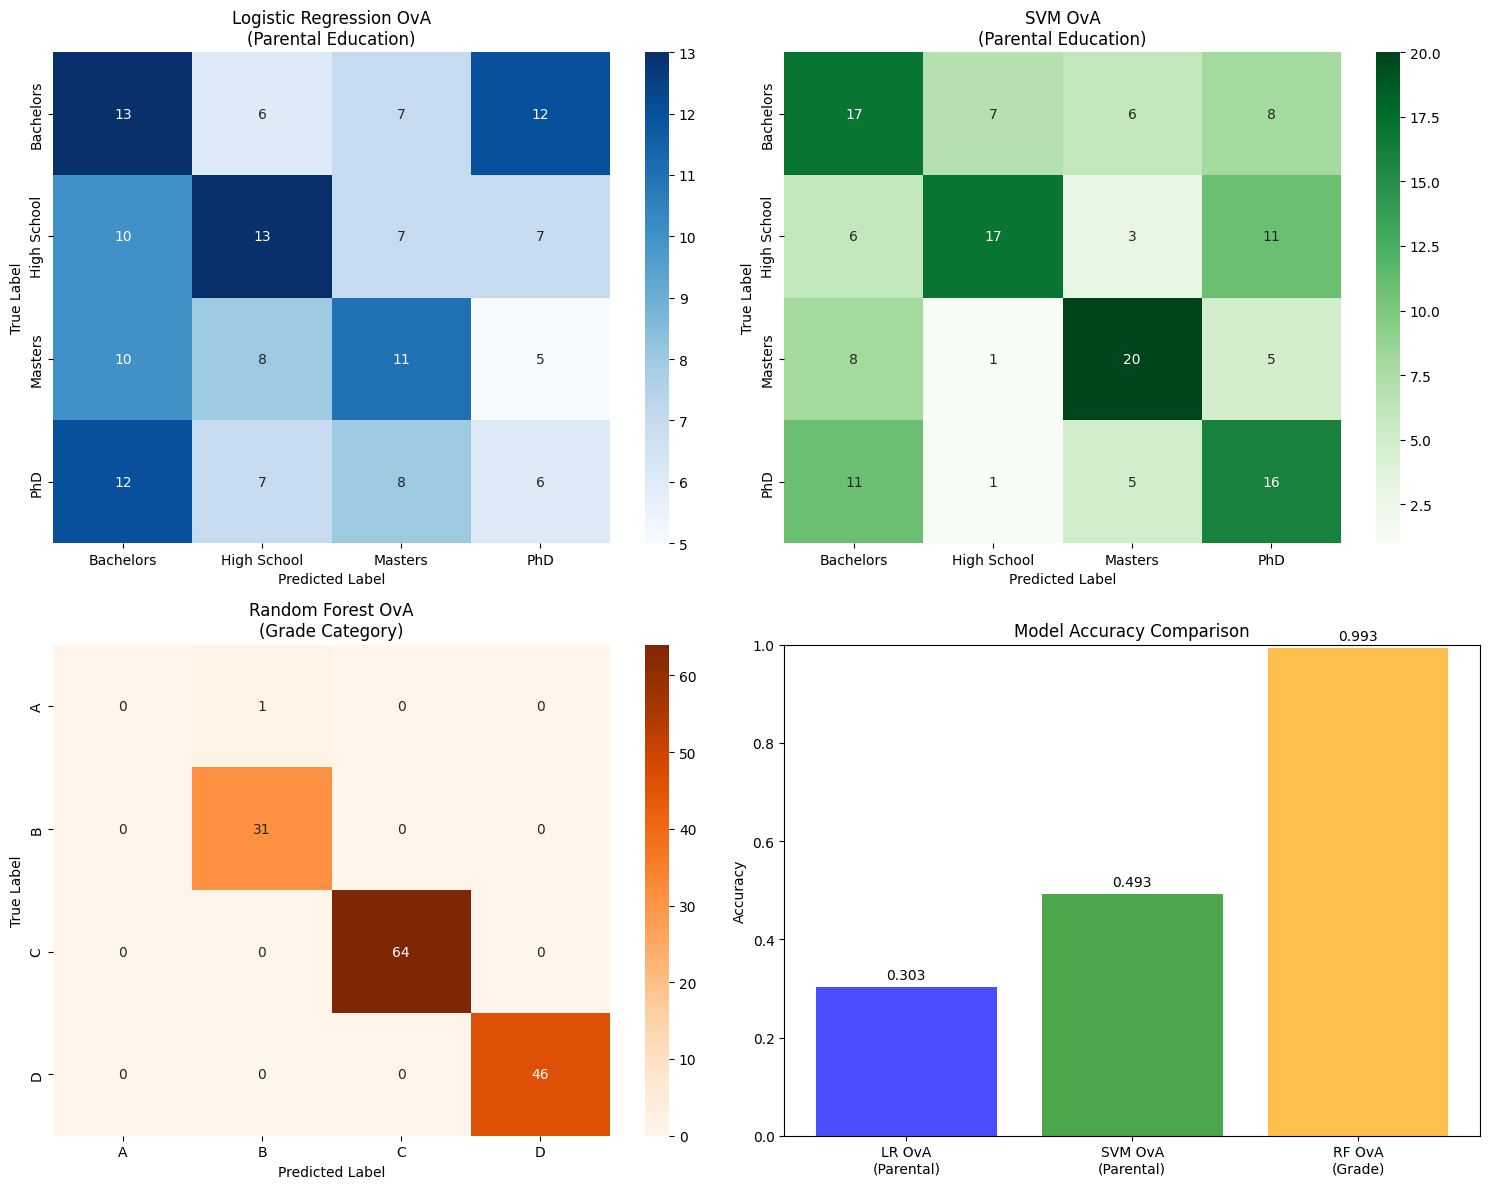


CROSS-VALIDATION RESULTS
Parental Education Classification:
Logistic Regression OvA - CV Accuracy: 0.2782 ± 0.0246
SVM OvA - CV Accuracy: 0.3588 ± 0.0422

Grade Category Classification:
Random Forest OvA - CV Accuracy: 0.9986 ± 0.0028

FEATURE IMPORTANCE (Random Forest)


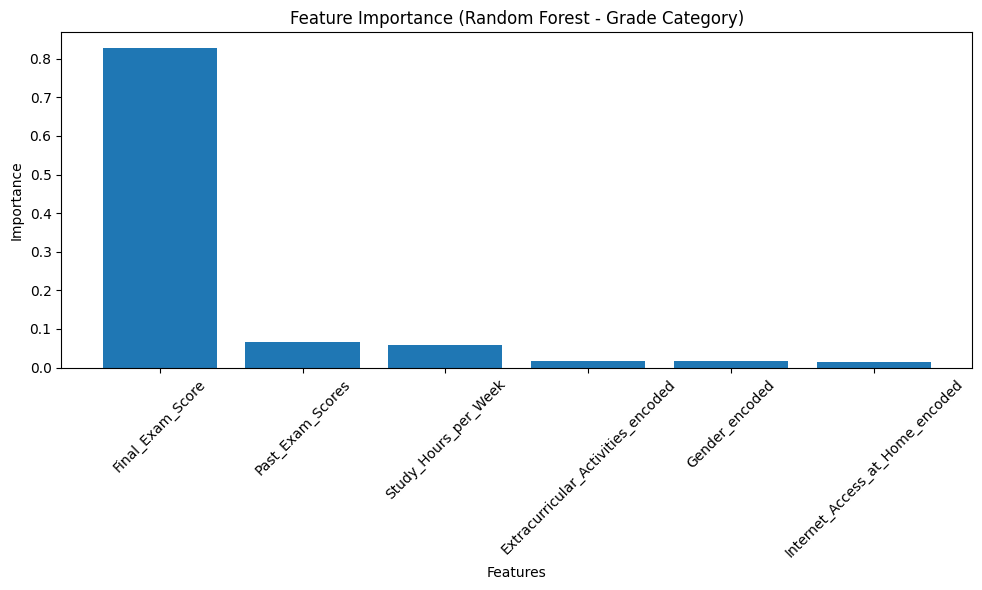


Feature Importance Rankings:
Final_Exam_Score: 0.8271
Past_Exam_Scores: 0.0650
Study_Hours_per_Week: 0.0594
Extracurricular_Activities_encoded: 0.0181
Gender_encoded: 0.0159
Internet_Access_at_Home_encoded: 0.0145

EXAMPLE PREDICTION

Prediction for new student:
Predicted Parental Education Level: Masters
Predicted Grade Category: B

SUMMARY
Model Performance Summary:
1. Parental Education Classification:
   - Logistic Regression OvA: 0.3028
   - SVM OvA: 0.4930
2. Grade Category Classification:
   - Random Forest OvA: 0.9930

Best performing model: Random Forest OvA (Grade Category)
Best accuracy: 0.9930


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('student_performance_dataset.csv', delimiter=';')

# Create grade categories based on Final_Exam_Score
def create_grade_category(score):
    if score >= 75:
        return 'A'
    elif score >= 65:
        return 'B'
    elif score >= 55:
        return 'C'
    else:
        return 'D'

df['Grade_Category'] = df['Final_Exam_Score'].apply(create_grade_category)

# Check distribusi target
print("\nParental Education Level distribution:")
print(df['Parental_Education_Level'].value_counts())

print("\nGrade Category distribution:")
print(df['Grade_Category'].value_counts())

# Prepare features for modeling
# Drop non-predictive columns
features_to_drop = ['Student_ID', 'Pass_Fail']  # We'll use Grade_Category instead
df_modeling = df.drop(columns=features_to_drop)

# Handle categorical variables with Label Encoding
label_encoders = {}
categorical_columns = ['Gender', 'Parental_Education_Level', 'Internet_Access_at_Home',
                      'Extracurricular_Activities']

for column in categorical_columns:
    le = LabelEncoder()
    if column != 'Parental_Education_Level':  # Keep this as target
        df_modeling[column + '_encoded'] = le.fit_transform(df_modeling[column])
        label_encoders[column] = le

# Prepare feature matrix X and target vectors y
feature_columns = ['Gender_encoded', 'Study_Hours_per_Week', 'Past_Exam_Scores',
                  'Internet_Access_at_Home_encoded', 'Extracurricular_Activities_encoded',
                  'Final_Exam_Score']

X = df_modeling[feature_columns]

# Handle attendance rate issue (seems to be formatted incorrectly)
# For now, we'll exclude it from features
print(f"\nFeature matrix shape: {X.shape}")
print("Features used:", feature_columns)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n" + "="*50)
print("MULTICLASS CLASSIFICATION - ONE VS ALL")
print("="*50)

# Target 1: Parental Education Level (4 classes)
print("\n1. PARENTAL EDUCATION LEVEL CLASSIFICATION")
print("-" * 40)

# Encode target
le_parental = LabelEncoder()
y_parental = le_parental.fit_transform(df['Parental_Education_Level'])

# Split data
X_train, X_test, y_train_p, y_test_p = train_test_split(
    X_scaled, y_parental, test_size=0.2, random_state=42, stratify=y_parental
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print("Classes:", le_parental.classes_)

# Model 1: Logistic Regression with One-vs-All
print("\n--- Logistic Regression One-vs-All ---")
lr_ova = OneVsRestClassifier(LogisticRegression(random_state=42, max_iter=1000))
lr_ova.fit(X_train, y_train_p)

# Predictions
y_pred_lr = lr_ova.predict(X_test)
accuracy_lr = accuracy_score(y_test_p, y_pred_lr)

print(f"Accuracy: {accuracy_lr:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_p, y_pred_lr, target_names=le_parental.classes_))

# Model 2: SVM with One-vs-All
print("\n--- SVM One-vs-All ---")
svm_ova = OneVsRestClassifier(SVC(kernel='rbf', random_state=42, probability=True))
svm_ova.fit(X_train, y_train_p)

y_pred_svm = svm_ova.predict(X_test)
accuracy_svm = accuracy_score(y_test_p, y_pred_svm)

print(f"Accuracy: {accuracy_svm:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_p, y_pred_svm, target_names=le_parental.classes_))

# Target 2: Grade Category (3-4 classes)
print("\n\n2. GRADE CATEGORY CLASSIFICATION")
print("-" * 40)

# Encode target
le_grade = LabelEncoder()
y_grade = le_grade.fit_transform(df['Grade_Category'])

# Split data
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(
    X_scaled, y_grade, test_size=0.2, random_state=42, stratify=y_grade
)

print("Classes:", le_grade.classes_)

# Model 3: Random Forest with One-vs-All
print("\n--- Random Forest One-vs-All ---")
rf_ova = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
rf_ova.fit(X_train_g, y_train_g)

y_pred_rf = rf_ova.predict(X_test_g)
accuracy_rf = accuracy_score(y_test_g, y_pred_rf)

print(f"Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_g, y_pred_rf, target_names=le_grade.classes_))

# Visualizations
print("\n" + "="*50)
print("VISUALIZATIONS")
print("="*50)

# Create confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Confusion Matrix for Logistic Regression (Parental Education)
cm_lr = confusion_matrix(y_test_p, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_parental.classes_,
            yticklabels=le_parental.classes_, ax=axes[0,0])
axes[0,0].set_title('Logistic Regression OvA\n(Parental Education)')
axes[0,0].set_ylabel('True Label')
axes[0,0].set_xlabel('Predicted Label')

# Confusion Matrix for SVM (Parental Education)
cm_svm = confusion_matrix(y_test_p, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=le_parental.classes_,
            yticklabels=le_parental.classes_, ax=axes[0,1])
axes[0,1].set_title('SVM OvA\n(Parental Education)')
axes[0,1].set_ylabel('True Label')
axes[0,1].set_xlabel('Predicted Label')

# Confusion Matrix for Random Forest (Grade Category)
cm_rf = confusion_matrix(y_test_g, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges',
            xticklabels=le_grade.classes_,
            yticklabels=le_grade.classes_, ax=axes[1,0])
axes[1,0].set_title('Random Forest OvA\n(Grade Category)')
axes[1,0].set_ylabel('True Label')
axes[1,0].set_xlabel('Predicted Label')

# Model Comparison
models = ['LR OvA\n(Parental)', 'SVM OvA\n(Parental)', 'RF OvA\n(Grade)']
accuracies = [accuracy_lr, accuracy_svm, accuracy_rf]

axes[1,1].bar(models, accuracies, color=['blue', 'green', 'orange'], alpha=0.7)
axes[1,1].set_title('Model Accuracy Comparison')
axes[1,1].set_ylabel('Accuracy')
axes[1,1].set_ylim(0, 1)

# Add accuracy values on bars
for i, v in enumerate(accuracies):
    axes[1,1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Cross-validation
print("\n" + "="*50)
print("CROSS-VALIDATION RESULTS")
print("="*50)

# Cross-validation for Parental Education models
cv_scores_lr = cross_val_score(lr_ova, X_scaled, y_parental, cv=5, scoring='accuracy')
cv_scores_svm = cross_val_score(svm_ova, X_scaled, y_parental, cv=5, scoring='accuracy')

print("Parental Education Classification:")
print(f"Logistic Regression OvA - CV Accuracy: {cv_scores_lr.mean():.4f} ± {cv_scores_lr.std():.4f}")
print(f"SVM OvA - CV Accuracy: {cv_scores_svm.mean():.4f} ± {cv_scores_svm.std():.4f}")

# Cross-validation for Grade Category model
cv_scores_rf = cross_val_score(rf_ova, X_scaled, y_grade, cv=5, scoring='accuracy')
print(f"\nGrade Category Classification:")
print(f"Random Forest OvA - CV Accuracy: {cv_scores_rf.mean():.4f} ± {cv_scores_rf.std():.4f}")

# Feature importance for Random Forest
print("\n" + "="*50)
print("FEATURE IMPORTANCE (Random Forest)")
print("="*50)

# Get feature importance from one of the Random Forest estimators
feature_importance = rf_ova.estimators_[0].feature_importances_
feature_names = feature_columns

# Create feature importance plot
plt.figure(figsize=(10, 6))
indices = np.argsort(feature_importance)[::-1]

plt.bar(range(len(feature_importance)), feature_importance[indices])
plt.xticks(range(len(feature_importance)), [feature_names[i] for i in indices], rotation=45)
plt.title('Feature Importance (Random Forest - Grade Category)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

print("\nFeature Importance Rankings:")
for i in indices:
    print(f"{feature_names[i]}: {feature_importance[i]:.4f}")

# Example prediction function
def predict_new_student(gender, study_hours, past_scores, internet, extracurricular, final_score):
    """
    Function to predict for new student data
    """
    # Encode categorical variables
    gender_encoded = 1 if gender.lower() == 'male' else 0
    internet_encoded = 1 if internet.lower() == 'yes' else 0
    extracurricular_encoded = 1 if extracurricular.lower() == 'yes' else 0

    # Create feature vector
    new_data = np.array([[gender_encoded, study_hours, past_scores,
                         internet_encoded, extracurricular_encoded, final_score]])

    # Scale the data
    new_data_scaled = scaler.transform(new_data)

    # Predictions
    parental_pred = lr_ova.predict(new_data_scaled)[0]
    grade_pred = rf_ova.predict(new_data_scaled)[0]

    # Decode predictions
    parental_education = le_parental.inverse_transform([parental_pred])[0]
    grade_category = le_grade.inverse_transform([grade_pred])[0]

    print(f"\nPrediction for new student:")
    print(f"Predicted Parental Education Level: {parental_education}")
    print(f"Predicted Grade Category: {grade_category}")

# Example usage
print("\n" + "="*50)
print("EXAMPLE PREDICTION")
print("="*50)

predict_new_student(
    gender='Female',
    study_hours=25,
    past_scores=80,
    internet='Yes',
    extracurricular='No',
    final_score=68
)

print("\n" + "="*50)
print("SUMMARY")
print("="*50)

print("Model Performance Summary:")
print(f"1. Parental Education Classification:")
print(f"   - Logistic Regression OvA: {accuracy_lr:.4f}")
print(f"   - SVM OvA: {accuracy_svm:.4f}")
print(f"2. Grade Category Classification:")
print(f"   - Random Forest OvA: {accuracy_rf:.4f}")

print(f"\nBest performing model: ", end="")
best_acc = max(accuracy_lr, accuracy_svm, accuracy_rf)
if best_acc == accuracy_lr:
    print("Logistic Regression OvA (Parental Education)")
elif best_acc == accuracy_svm:
    print("SVM OvA (Parental Education)")
else:
    print("Random Forest OvA (Grade Category)")

print(f"Best accuracy: {best_acc:.4f}")

one-vs-one

=== LOADING DAN PREPROCESSING DATA ===

=== DISTRIBUSI KELAS TARGET ===
Performance_Category
Average      337
Poor         256
Good         111
Excellent      4
Name: count, dtype: int64


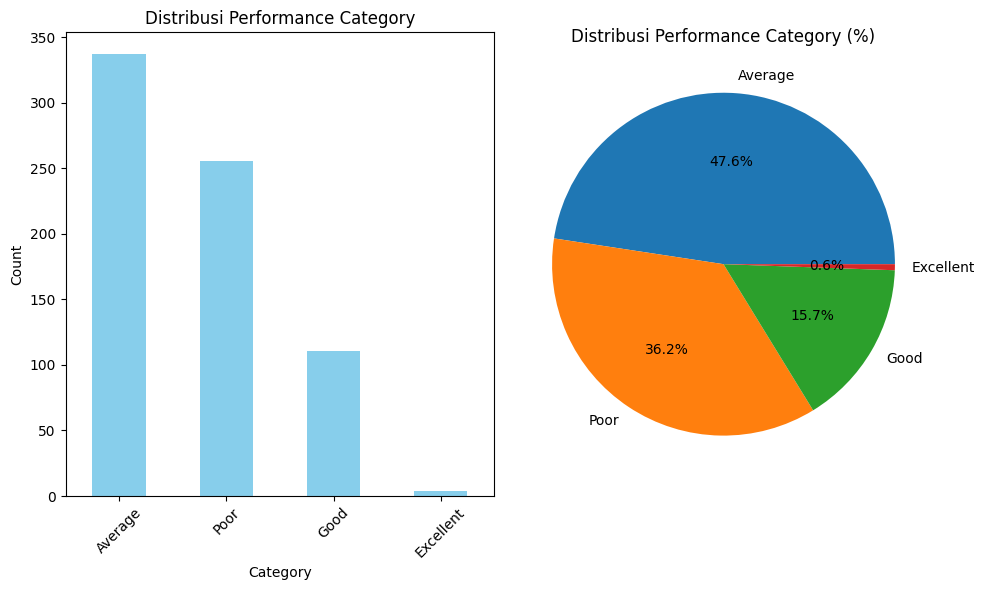


=== FEATURE ENGINEERING ===
Encoded Gender: ['Female' 'Male']
Encoded Parental_Education_Level: ['Bachelors' 'High School' 'Masters' 'PhD']
Encoded Internet_Access_at_Home: ['No' 'Yes']
Encoded Extracurricular_Activities: ['No' 'Yes']

Final features shape: (708, 7)
Target shape: (708,)

=== SPLIT DATA ===
Training set: (566, 7)
Test set: (142, 7)
Training target distribution:
Performance_Category
Average      269
Poor         205
Good          89
Excellent      3
Name: count, dtype: int64

=== SCALING FEATURES ===
Features berhasil di-scale menggunakan StandardScaler

=== IMPLEMENTASI ONE-VS-ONE CLASSIFICATION ===
Jumlah kelas: 4
Jumlah binary classifier yang akan dibuat: 6
Kombinasi kelas: ['Average', 'Excellent', 'Good', 'Poor']

--- One-vs-One dengan SVM ---
Akurasi OvO-SVM: 0.6901

--- One-vs-One dengan Random Forest ---
Akurasi OvO-RF: 0.8169

=== EVALUASI MODEL ===


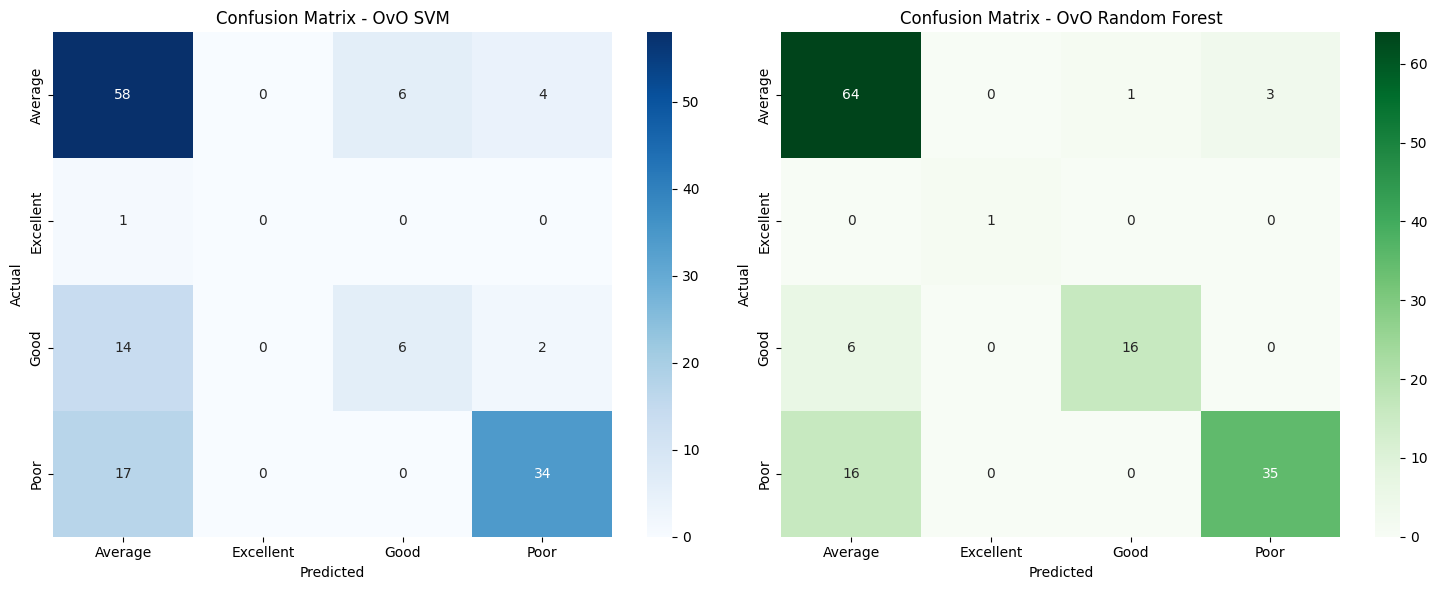


--- Classification Report OvO-SVM ---
              precision    recall  f1-score   support

     Average       0.64      0.85      0.73        68
   Excellent       0.00      0.00      0.00         1
        Good       0.50      0.27      0.35        22
        Poor       0.85      0.67      0.75        51

    accuracy                           0.69       142
   macro avg       0.50      0.45      0.46       142
weighted avg       0.69      0.69      0.67       142


--- Classification Report OvO-Random Forest ---
              precision    recall  f1-score   support

     Average       0.74      0.94      0.83        68
   Excellent       1.00      1.00      1.00         1
        Good       0.94      0.73      0.82        22
        Poor       0.92      0.69      0.79        51

    accuracy                           0.82       142
   macro avg       0.90      0.84      0.86       142
weighted avg       0.84      0.82      0.81       142


=== ANALISIS DETIL ONE-VS-ONE ===
Estimat

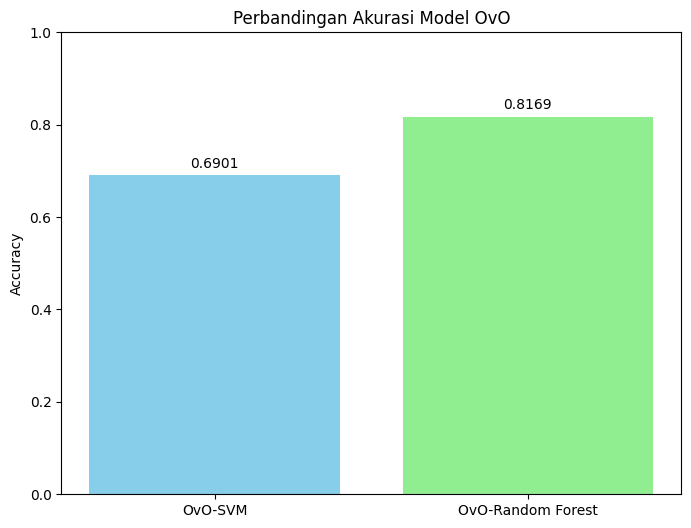


=== CONTOH PREDIKSI DATA BARU ===
Data mahasiswa baru:
   Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores Gender  \
0                    25             85.5                78   Male   

  Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities  
0                Bachelors                     Yes                         No  

Prediksi OvO-SVM: Poor
Prediksi OvO-RF: Poor

=== ANALISIS SELESAI ===
Model One-vs-One berhasil diimplementasikan!
Jumlah binary classifier yang digunakan: 6
Akurasi terbaik: 0.8169


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import warnings
warnings.filterwarnings('ignore')

# 1. LOAD DAN PREPROCESSING DATA
# Load dataset
df = pd.read_csv('student_performance_dataset.csv', delimiter=';')

# Preprocessing data
# Fix Attendance_Rate yang formatnya tidak konsisten
df['Attendance_Rate'] = df['Attendance_Rate'].str.replace('.', '', regex=False).astype(float) / 10**12

# Buat kategori Performance berdasarkan Final_Exam_Score
def categorize_performance(score):
    if score <= 55:
        return 'Poor'
    elif score <= 65:
        return 'Average'
    elif score <= 75:
        return 'Good'
    else:
        return 'Excellent'

df['Performance_Category'] = df['Final_Exam_Score'].apply(categorize_performance)

# Cek distribusi kelas
print("\n=== DISTRIBUSI KELAS TARGET ===")
print(df['Performance_Category'].value_counts())

# Visualisasi distribusi kelas
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df['Performance_Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribusi Performance Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
df['Performance_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribusi Performance Category (%)')
plt.ylabel('')

plt.tight_layout()
plt.show()

# 2. FEATURE ENGINEERING
print("\n=== FEATURE ENGINEERING ===")

# Pilih fitur untuk modeling
feature_columns = [
    'Study_Hours_per_Week',
    'Attendance_Rate',
    'Past_Exam_Scores',
    'Gender',
    'Parental_Education_Level',
    'Internet_Access_at_Home',
    'Extracurricular_Activities'
]

# Siapkan data untuk modeling
X = df[feature_columns].copy()
y = df['Performance_Category'].copy()

# Encode categorical variables
categorical_features = ['Gender', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities']
label_encoders = {}

for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])
    label_encoders[feature] = le
    print(f"Encoded {feature}: {le.classes_}")

print(f"\nFinal features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# 3. SPLIT DATA
print("\n=== SPLIT DATA ===")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training target distribution:\n{y_train.value_counts()}")

# 4. SCALING FEATURES
print("\n=== SCALING FEATURES ===")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features berhasil di-scale menggunakan StandardScaler")

# 5. IMPLEMENTASI ONE-VS-ONE CLASSIFICATION
print("\n=== IMPLEMENTASI ONE-VS-ONE CLASSIFICATION ===")

# Hitung jumlah classifier yang akan dibuat
n_classes = len(np.unique(y))
n_classifiers = n_classes * (n_classes - 1) // 2
print(f"Jumlah kelas: {n_classes}")
print(f"Jumlah binary classifier yang akan dibuat: {n_classifiers}")
print(f"Kombinasi kelas: {list(np.unique(y))}")

# Implementasi OvO dengan SVM
print("\n--- One-vs-One dengan SVM ---")
ovo_svm = OneVsOneClassifier(SVC(kernel='rbf', random_state=42))
ovo_svm.fit(X_train_scaled, y_train)

# Prediksi
ovo_svm_pred = ovo_svm.predict(X_test_scaled)
ovo_svm_accuracy = accuracy_score(y_test, ovo_svm_pred)

print(f"Akurasi OvO-SVM: {ovo_svm_accuracy:.4f}")

# Implementasi OvO dengan Random Forest
print("\n--- One-vs-One dengan Random Forest ---")
ovo_rf = OneVsOneClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
ovo_rf.fit(X_train, y_train)  # RF tidak perlu scaling

# Prediksi
ovo_rf_pred = ovo_rf.predict(X_test)
ovo_rf_accuracy = accuracy_score(y_test, ovo_rf_pred)

print(f"Akurasi OvO-RF: {ovo_rf_accuracy:.4f}")

# 6. EVALUASI MODEL
print("\n=== EVALUASI MODEL ===")

# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, ovo_svm_pred)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y), ax=axes[0])
axes[0].set_title('Confusion Matrix - OvO SVM')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, ovo_rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y), yticklabels=np.unique(y), ax=axes[1])
axes[1].set_title('Confusion Matrix - OvO Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Classification Report
print("\n--- Classification Report OvO-SVM ---")
print(classification_report(y_test, ovo_svm_pred))

print("\n--- Classification Report OvO-Random Forest ---")
print(classification_report(y_test, ovo_rf_pred))

# 7. ANALISIS DETIL ONE-VS-ONE
print("\n=== ANALISIS DETIL ONE-VS-ONE ===")

# Melihat estimator individual dalam OvO
print("Estimator dalam OvO-SVM:")
for i, estimator in enumerate(ovo_svm.estimators_):
    print(f"Classifier {i+1}: {ovo_svm.classes_[ovo_svm.estimators_[i].classes_[0]]} vs {ovo_svm.classes_[ovo_svm.estimators_[i].classes_[1]]}")

# Perbandingan akurasi
models_comparison = {
    'Model': ['OvO-SVM', 'OvO-Random Forest'],
    'Accuracy': [ovo_svm_accuracy, ovo_rf_accuracy]
}

comparison_df = pd.DataFrame(models_comparison)
print("\n--- Perbandingan Model ---")
print(comparison_df)

# Visualisasi perbandingan
plt.figure(figsize=(8, 6))
plt.bar(comparison_df['Model'], comparison_df['Accuracy'], color=['skyblue', 'lightgreen'])
plt.title('Perbandingan Akurasi Model OvO')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(comparison_df['Accuracy']):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()

# 8. PREDIKSI PADA DATA BARU
print("\n=== CONTOH PREDIKSI DATA BARU ===")

# Contoh data baru
new_student = pd.DataFrame({
    'Study_Hours_per_Week': [25],
    'Attendance_Rate': [85.5],
    'Past_Exam_Scores': [78],
    'Gender': ['Male'],
    'Parental_Education_Level': ['Bachelors'],
    'Internet_Access_at_Home': ['Yes'],
    'Extracurricular_Activities': ['No']
})

# Encode categorical features
new_student_encoded = new_student.copy()
for feature in categorical_features:
    new_student_encoded[feature] = label_encoders[feature].transform(new_student[feature])

# Scale features untuk SVM
new_student_scaled = scaler.transform(new_student_encoded)

# Prediksi
svm_prediction = ovo_svm.predict(new_student_scaled)
rf_prediction = ovo_rf.predict(new_student_encoded)

print("Data mahasiswa baru:")
print(new_student)
print(f"\nPrediksi OvO-SVM: {svm_prediction[0]}")
print(f"Prediksi OvO-RF: {rf_prediction[0]}")

# Probabilitas prediksi (jika supported)
if hasattr(ovo_svm, 'predict_proba'):
    svm_proba = ovo_svm.predict_proba(new_student_scaled)
    print(f"Probabilitas SVM: {dict(zip(ovo_svm.classes_, svm_proba[0]))}")

print("\n=== ANALISIS SELESAI ===")
print("Model One-vs-One berhasil diimplementasikan!")
print(f"Jumlah binary classifier yang digunakan: {n_classifiers}")
print(f"Akurasi terbaik: {max(ovo_svm_accuracy, ovo_rf_accuracy):.4f}")

Perbandingan Komprehensif Model Multiclass Classification

=== LOADING DAN PREPROCESSING DATA ===
Dataset shape: (708, 10)

Distribusi Target Classes:
Performance_Category
Medium    672
High       36
Name: count, dtype: int64
Training set: (566, 6)
Test set: (142, 6)

=== TRAINING MODELS ===

1. SOFTMAX REGRESSION
Accuracy: 0.9507
Training time: 0.0073 seconds

2. ONE-VS-ALL
Accuracy: 0.9507
Training time: 0.0158 seconds

3. ONE-VS-ONE
Accuracy: 0.9507
Training time: 0.0200 seconds

=== PERBANDINGAN PERFORMA DETAIL ===

Tabel Perbandingan Lengkap:
        Model  Accuracy  Precision  Recall  F1_Score  Training_Time
0     Softmax    0.9507     0.9038  0.9507    0.9267         0.0073
1  One-vs-All    0.9507     0.9038  0.9507    0.9267         0.0158
2  One-vs-One    0.9507     0.9038  0.9507    0.9267         0.0200

=== CROSS-VALIDATION COMPARISON ===
Softmax: 0.9488 ± 0.0035
One-vs-All: 0.9488 ± 0.0035
One-vs-One: 0.9488 ± 0.0035

=== CREATING VISUALIZATIONS ===


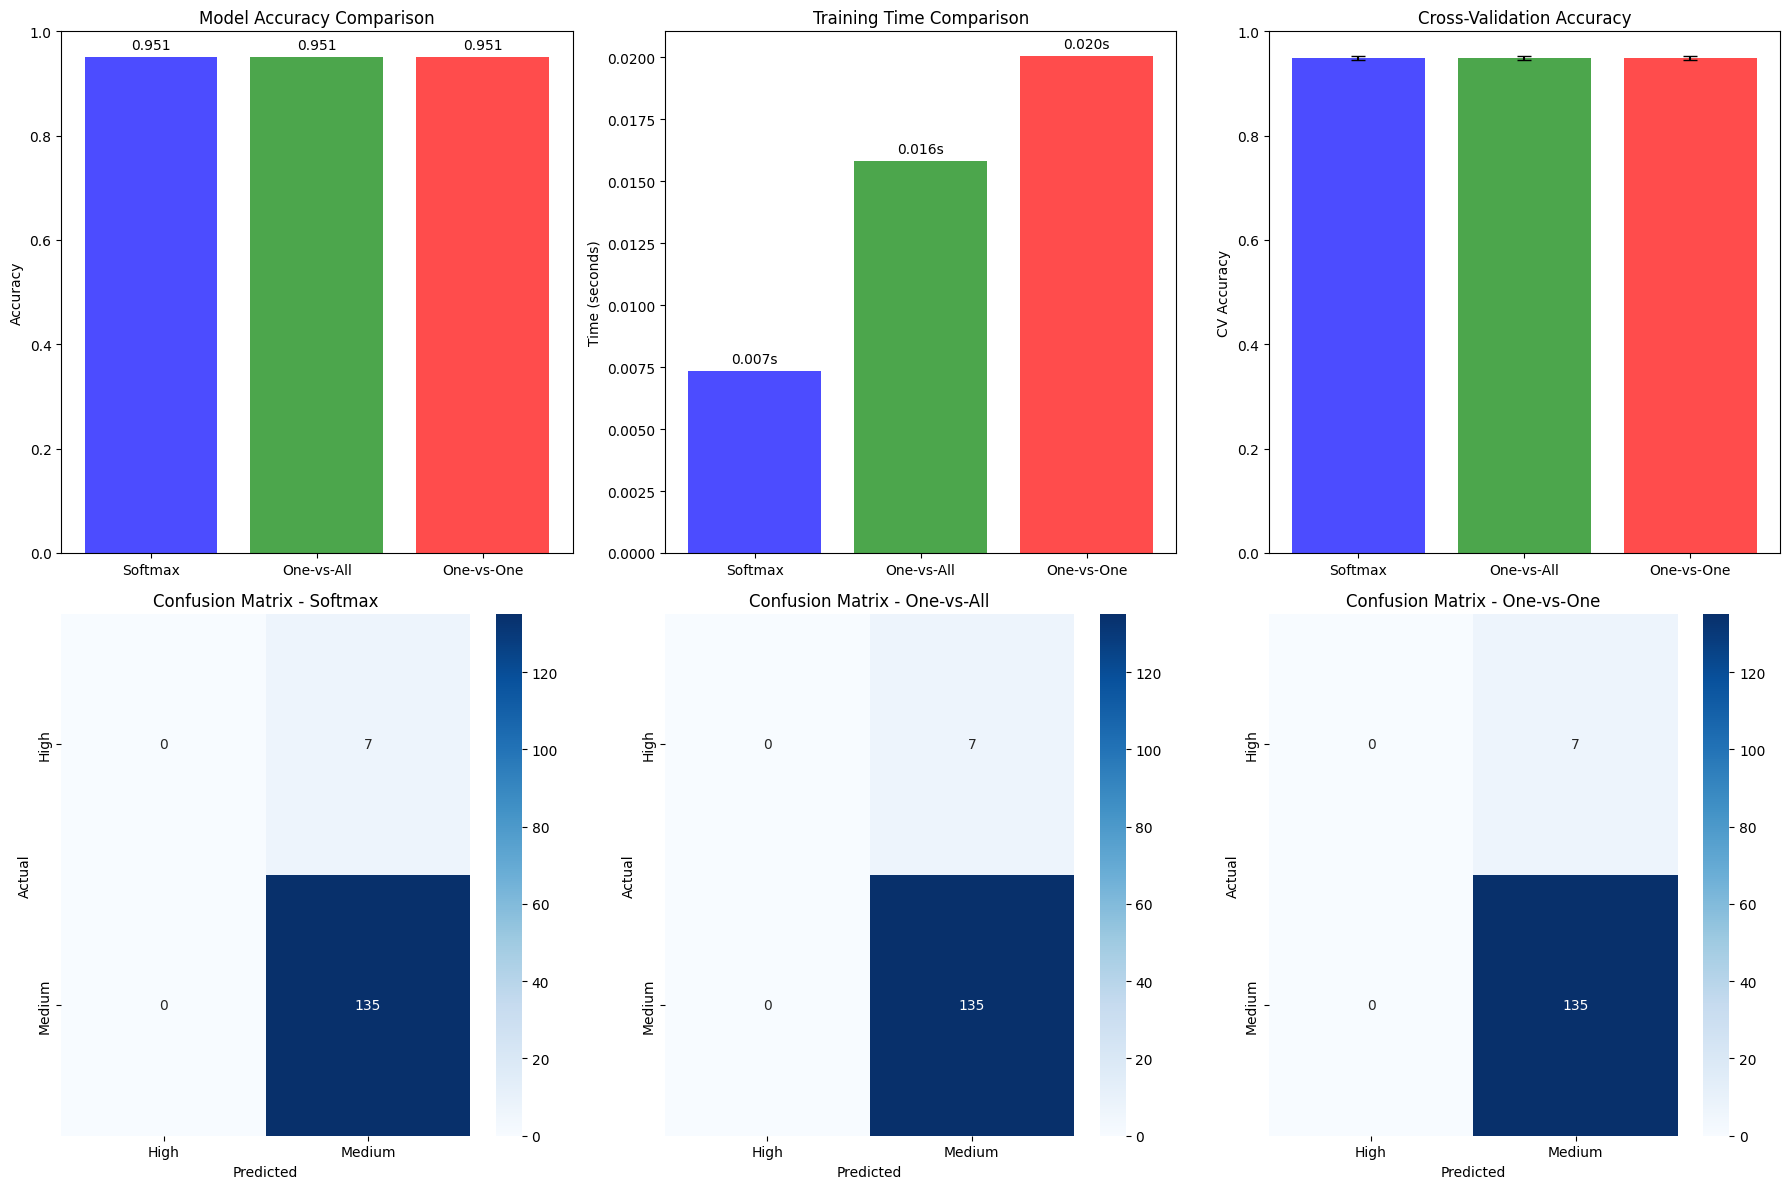


=== DETAILED METRICS BY CLASS ===

--- SOFTMAX ---
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         7
      Medium       0.95      1.00      0.97       135

    accuracy                           0.95       142
   macro avg       0.48      0.50      0.49       142
weighted avg       0.90      0.95      0.93       142


--- ONE-VS-ALL ---
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         7
      Medium       0.95      1.00      0.97       135

    accuracy                           0.95       142
   macro avg       0.48      0.50      0.49       142
weighted avg       0.90      0.95      0.93       142


--- ONE-VS-ONE ---
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         7
      Medium       0.95      1.00      0.97       135

    accuracy                           0.95       142
   macro avg       0.48      0.50   

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support, f1_score
import time
import warnings
warnings.filterwarnings('ignore')

# ====== 1. LOAD DAN PREPROCESSING DATA ======
print("=== LOADING DAN PREPROCESSING DATA ===")

# Load dataset
df = pd.read_csv('student_performance_dataset.csv', delimiter=';')
print(f"Dataset shape: {df.shape}")

# Preprocessing data
def create_performance_category(score):
    if score < 50:
        return 'Low'
    elif score < 70:
        return 'Medium'
    else:
        return 'High'

df['Performance_Category'] = df['Final_Exam_Score'].apply(create_performance_category)

# Display target distribution
print("\nDistribusi Target Classes:")
print(df['Performance_Category'].value_counts())

# Prepare features
feature_columns = [
    'Study_Hours_per_Week', 'Past_Exam_Scores', 'Gender',
    'Parental_Education_Level', 'Internet_Access_at_Home',
    'Extracurricular_Activities'
]

# Create copy for modeling
df_model = df.copy()

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities']

for col in categorical_columns:
    le = LabelEncoder()
    df_model[col + '_encoded'] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Prepare features and target
X_features = [
    'Study_Hours_per_Week', 'Past_Exam_Scores', 'Gender_encoded',
    'Parental_Education_Level_encoded', 'Internet_Access_at_Home_encoded',
    'Extracurricular_Activities_encoded'
]

X = df_model[X_features]
y = df_model['Performance_Category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# ====== 2. MODEL IMPLEMENTATIONS ======
models_results = {}

print("\n=== TRAINING MODELS ===")

# Model 1: Softmax Regression (Multinomial Logistic Regression)
print("\n1. SOFTMAX REGRESSION")
start_time = time.time()

softmax_model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
softmax_model.fit(X_train_scaled, y_train)
softmax_pred = softmax_model.predict(X_test_scaled)
softmax_time = time.time() - start_time

models_results['Softmax'] = {
    'model': softmax_model,
    'predictions': softmax_pred,
    'training_time': softmax_time,
    'accuracy': accuracy_score(y_test, softmax_pred)
}

print(f"Accuracy: {models_results['Softmax']['accuracy']:.4f}")
print(f"Training time: {softmax_time:.4f} seconds")

# Model 2: One-vs-All (One-vs-Rest)
print("\n2. ONE-VS-ALL")
start_time = time.time()

ova_model = OneVsRestClassifier(LogisticRegression(random_state=42, max_iter=1000))
ova_model.fit(X_train_scaled, y_train)
ova_pred = ova_model.predict(X_test_scaled)
ova_time = time.time() - start_time

models_results['One-vs-All'] = {
    'model': ova_model,
    'predictions': ova_pred,
    'training_time': ova_time,
    'accuracy': accuracy_score(y_test, ova_pred)
}

print(f"Accuracy: {models_results['One-vs-All']['accuracy']:.4f}")
print(f"Training time: {ova_time:.4f} seconds")

# Model 3: One-vs-One
print("\n3. ONE-VS-ONE")
start_time = time.time()

ovo_model = OneVsOneClassifier(SVC(kernel='rbf', random_state=42))
ovo_model.fit(X_train_scaled, y_train)
ovo_pred = ovo_model.predict(X_test_scaled)
ovo_time = time.time() - start_time

models_results['One-vs-One'] = {
    'model': ovo_model,
    'predictions': ovo_pred,
    'training_time': ovo_time,
    'accuracy': accuracy_score(y_test, ovo_pred)
}

print(f"Accuracy: {models_results['One-vs-One']['accuracy']:.4f}")
print(f"Training time: {ovo_time:.4f} seconds")

# ====== 3. DETAILED PERFORMANCE COMPARISON ======
print("\n=== PERBANDINGAN PERFORMA DETAIL ===")

# Calculate detailed metrics
comparison_data = []
for model_name, results in models_results.items():
    pred = results['predictions']
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred, average='weighted')

    comparison_data.append({
        'Model': model_name,
        'Accuracy': results['accuracy'],
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1,
        'Training_Time': results['training_time'],
        #'N_Classifiers': get_n_classifiers(results['model'], len(np.unique(y)))
    })

def get_n_classifiers(model, n_classes):
    """Get number of binary classifiers used"""
    if hasattr(model, 'estimators_'):
        return len(model.estimators_)
    elif isinstance(model, LogisticRegression) and model.multi_class == 'multinomial':
        return 1  # Single multinomial model
    else:
        return n_classes  # Default for OvA

comparison_df = pd.DataFrame(comparison_data)
print("\nTabel Perbandingan Lengkap:")
print(comparison_df.round(4))

# ====== 4. CROSS-VALIDATION COMPARISON ======
print("\n=== CROSS-VALIDATION COMPARISON ===")

cv_results = {}
for model_name, results in models_results.items():
    model = results['model']
    if model_name == 'Softmax':
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    else:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

    cv_results[model_name] = {
        'mean': cv_scores.mean(),
        'std': cv_scores.std(),
        'scores': cv_scores
    }

    print(f"{model_name}: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# ====== 5. VISUALIZATIONS ======
print("\n=== CREATING VISUALIZATIONS ===")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Accuracy Comparison
models = list(models_results.keys())
accuracies = [models_results[m]['accuracy'] for m in models]

axes[0,0].bar(models, accuracies, color=['blue', 'green', 'red'], alpha=0.7)
axes[0,0].set_title('Model Accuracy Comparison')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_ylim(0, 1)
for i, v in enumerate(accuracies):
    axes[0,0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# 2. Training Time Comparison
training_times = [models_results[m]['training_time'] for m in models]
axes[0,1].bar(models, training_times, color=['blue', 'green', 'red'], alpha=0.7)
axes[0,1].set_title('Training Time Comparison')
axes[0,1].set_ylabel('Time (seconds)')
for i, v in enumerate(training_times):
    axes[0,1].text(i, v + max(training_times)*0.01, f'{v:.3f}s', ha='center', va='bottom')

# 3. Cross-Validation Scores
cv_means = [cv_results[m]['mean'] for m in models]
cv_stds = [cv_results[m]['std'] for m in models]
axes[0,2].bar(models, cv_means, yerr=cv_stds, color=['blue', 'green', 'red'], alpha=0.7, capsize=5)
axes[0,2].set_title('Cross-Validation Accuracy')
axes[0,2].set_ylabel('CV Accuracy')
axes[0,2].set_ylim(0, 1)

# 4. Confusion Matrices
for i, (model_name, results) in enumerate(models_results.items()):
    row = 1
    col = i

    cm = confusion_matrix(y_test, results['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y), yticklabels=np.unique(y),
                ax=axes[row, col])
    axes[row, col].set_title(f'Confusion Matrix - {model_name}')
    axes[row, col].set_xlabel('Predicted')
    axes[row, col].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ====== 6. DETAILED METRICS BY CLASS ======
print("\n=== DETAILED METRICS BY CLASS ===")

for model_name, results in models_results.items():
    print(f"\n--- {model_name.upper()} ---")
    print(classification_report(y_test, results['predictions']))

# ====== 7. MODEL COMPLEXITY ANALYSIS ======
print("\n=== ANALISIS KOMPLEKSITAS MODEL ===")

complexity_data = []
for model_name, results in models_results.items():
    model = results['model']
    n_classes = len(np.unique(y))

    if model_name == 'Softmax':
        n_classifiers = 1
        complexity = "O(n_features × n_classes)"
    elif model_name == 'One-vs-All':
        n_classifiers = n_classes
        complexity = f"O({n_classes} × n_features)"
    else:  # One-vs-One
        n_classifiers = n_classes * (n_classes - 1) // 2
        complexity = f"O({n_classifiers} × n_features)"

    complexity_data.append({
        'Model': model_name,
        'Number_of_Classifiers': n_classifiers,
        'Complexity': complexity,
        'Memory_Usage': 'Low' if n_classifiers <= 3 else 'Medium' if n_classifiers <= 6 else 'High'
    })

complexity_df = pd.DataFrame(complexity_data)
print("\nKompleksitas Model:")
print(complexity_df)

# ====== 8. RECOMMENDATIONS ======
print("\n=== REKOMENDASI ===")

best_accuracy = max(accuracies)
best_model = models[accuracies.index(best_accuracy)]
fastest_model = models[training_times.index(min(training_times))]

print(f"Model dengan akurasi tertinggi: {best_model} ({best_accuracy:.4f})")
print(f"Model tercepat dalam training: {fastest_model} ({min(training_times):.4f}s)")

print("\nRekomendasi berdasarkan skenario:")
print("1. Untuk akurasi maksimal: Gunakan", best_model)
print("2. Untuk kecepatan training: Gunakan", fastest_model)
print("3. Untuk dataset besar: Gunakan Softmax (paling efisien)")
print("4. Untuk interpretabilitas: Gunakan One-vs-All")

# ====== 9. FINAL SUMMARY ======
print("\n=== RINGKASAN FINAL ===")
print("Dataset: Student Performance (3 classes: Low, Medium, High)")
print(f"Jumlah sampel: {len(df)} (Training: {len(X_train)}, Test: {len(X_test)})")
print(f"Jumlah fitur: {len(X_features)}")

print("\nPerforma Model:")
for model_name in models:
    acc = models_results[model_name]['accuracy']
    time_taken = models_results[model_name]['training_time']
    cv_score = cv_results[model_name]['mean']
    print(f"- {model_name}: Accuracy={acc:.4f}, CV={cv_score:.4f}, Time={time_taken:.4f}s")

print(f"\nModel terbaik secara keseluruhan: {best_model}")
print("Analisis selesai!")